In [1]:
import duckdb
duckdb.__version__

'0.6.1'

In [2]:
db_name = './genie.duckdb'
con = duckdb.connect(database=db_name, read_only=True)

In [16]:
query = """
SELECT COLUMN_NAME
    FROM INFORMATION_SCHEMA.COLUMNS
    WHERE table_name = 'meta_table'
"""
df = con.execute(query).df()
#print all columns that contain lung
print(df[df['column_name'].str.contains('lung')])

                                           column_name
24      tumortype_adenoid cystic carcinoma of the lung
79                   tumortype_atypical lung carcinoid
96   tumortype_basaloid large cell carcinoma of the...
163  tumortype_ciliated muconodular papillary tumor...
167         tumortype_clear cell carcinoma of the lung
181       tumortype_combined small cell lung carcinoma
274         tumortype_giant cell carcinoma of the lung
326  tumortype_inflammatory myofibroblastic lung tumor
340                tumortype_large cell lung carcinoma
357                                     tumortype_lung
358                      tumortype_lung adenocarcinoma
359              tumortype_lung adenocarcinoma in situ
360             tumortype_lung adenosquamous carcinoma
361                           tumortype_lung carcinoid
362                tumortype_lung neuroendocrine tumor
363             tumortype_lung squamous cell carcinoma
364  tumortype_lymphoepithelioma-like carcinoma of ...
435     tu

In [22]:
query = 'SELECT tissuename FROM meta_table WHERE gender_male=1 AND race_black=1 AND "tumortype_lung adenocarcinoma"=1'
#print('#query\n', query)
df = con.execute(query).df()
df

,tissuename
0,GENIE-YALE-TPL210-1
1,GENIE-YALE-TPL263-1
2,GENIE-DFCI-003312-8194
3,GENIE-DFCI-010893-9207
4,GENIE-MSK-P-0005962-T01-IM5
...,...
363,GENIE-JHU-01346-01705
364,GENIE-JHU-01784-02188
365,GENIE-JHU-02860-03388
366,GENIE-JHU-03557-04169


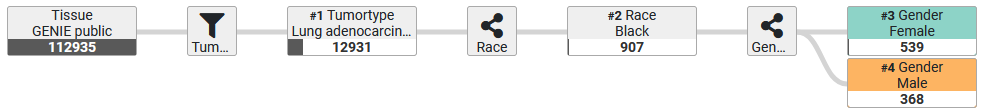